In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [28]:
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams['font.size'] = 20
plt.rcParams["text.usetex"] = True

In [12]:
def plotBeads(ax, nBeads=10, plotBeads=True, vLine=True, plotDim=1, beadColours=[]):
    nBeads = 10
    beadWidth = plotDim / nBeads
    beadRadius = beadWidth / 2
    beadCentre_x = beadRadius 
    beadCentre_y = beadRadius
    beadLinePos = []
    if config['plotBeads'] or config['vLine']:
        for i in range(nBeads):
            try:
                beadColour = beadColours[i]
            except IndexError:
                beadColour = '#000000'
            if plotBeads:
                a_circle = plt.Circle((beadCentre_x, beadCentre_y), beadRadius, color=beadColour)
                ax.add_artist(a_circle)
            # Add vline after each bead (except last)
            if vLine and (i != nBeads - 1):
                vLine = beadCentre_x + beadRadius
                ax.axvline(beadCentre_x + beadRadius, color='r', linestyle='--', alpha=0.5)
                beadLinePos.append(vLine)
            beadCentre_x += beadWidth
    ax.set(xlim=(0, plotDim), ylim = (0, beadRadius*2))
    
    return ax, beadLinePos

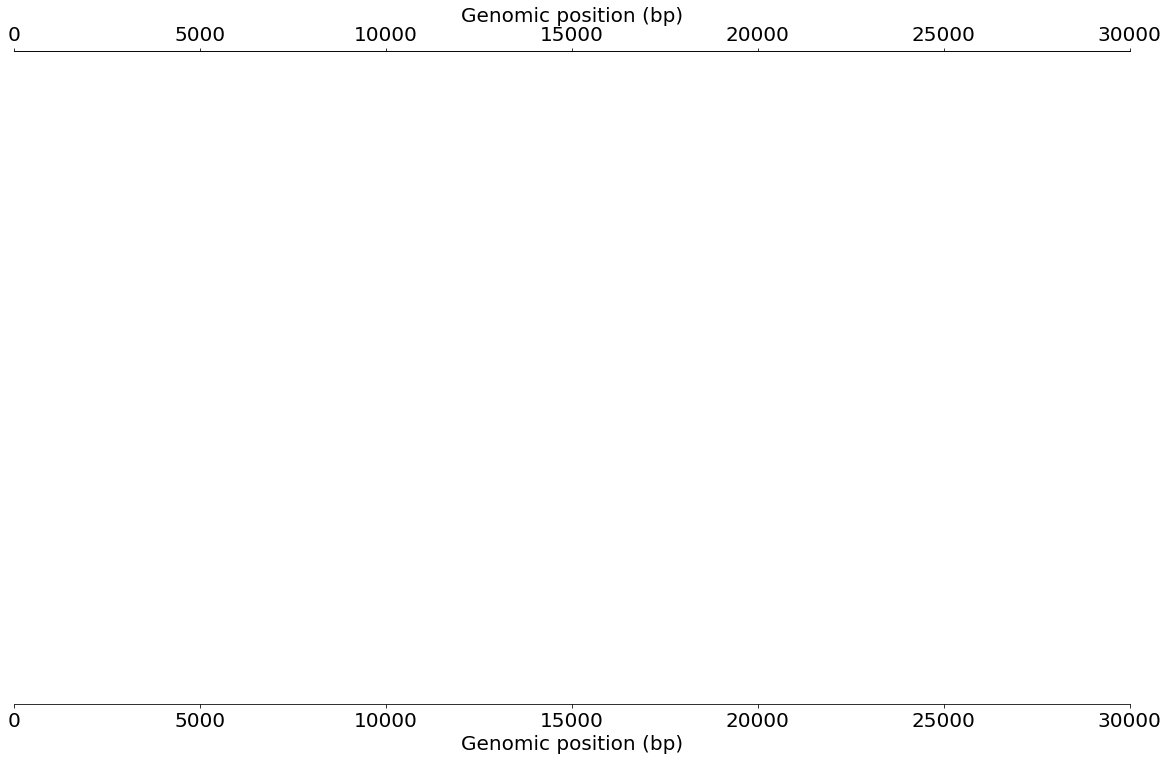

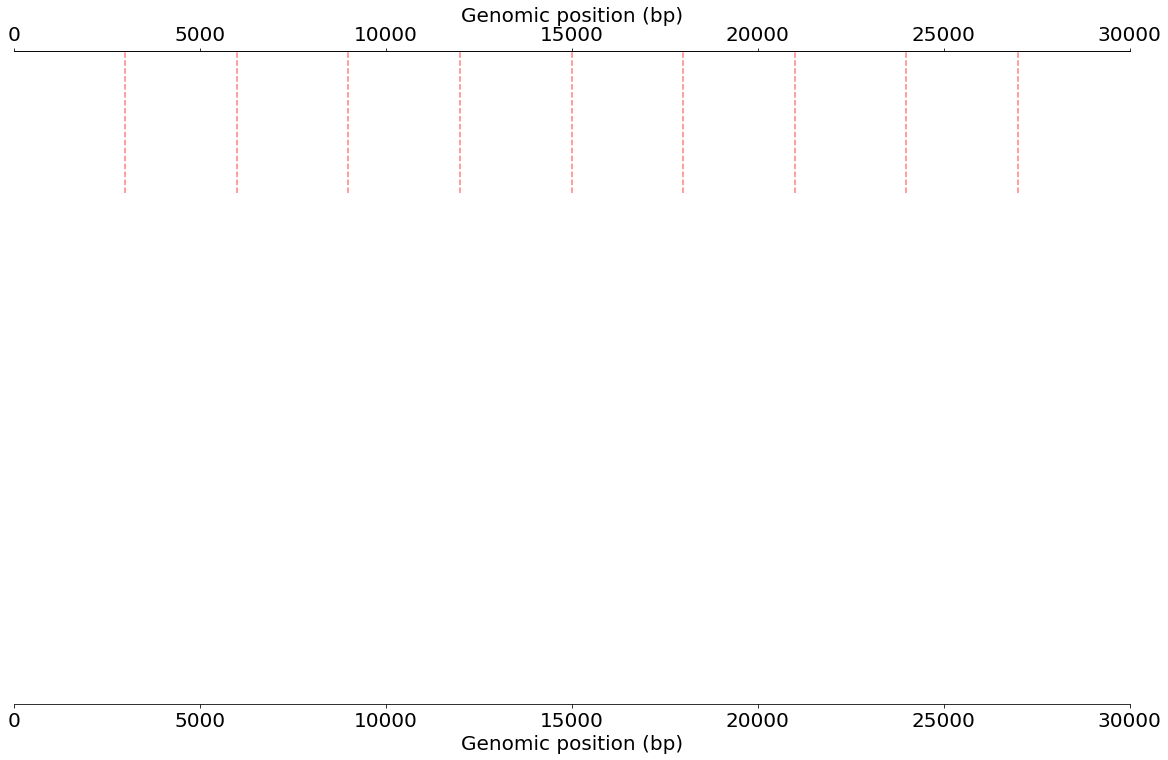

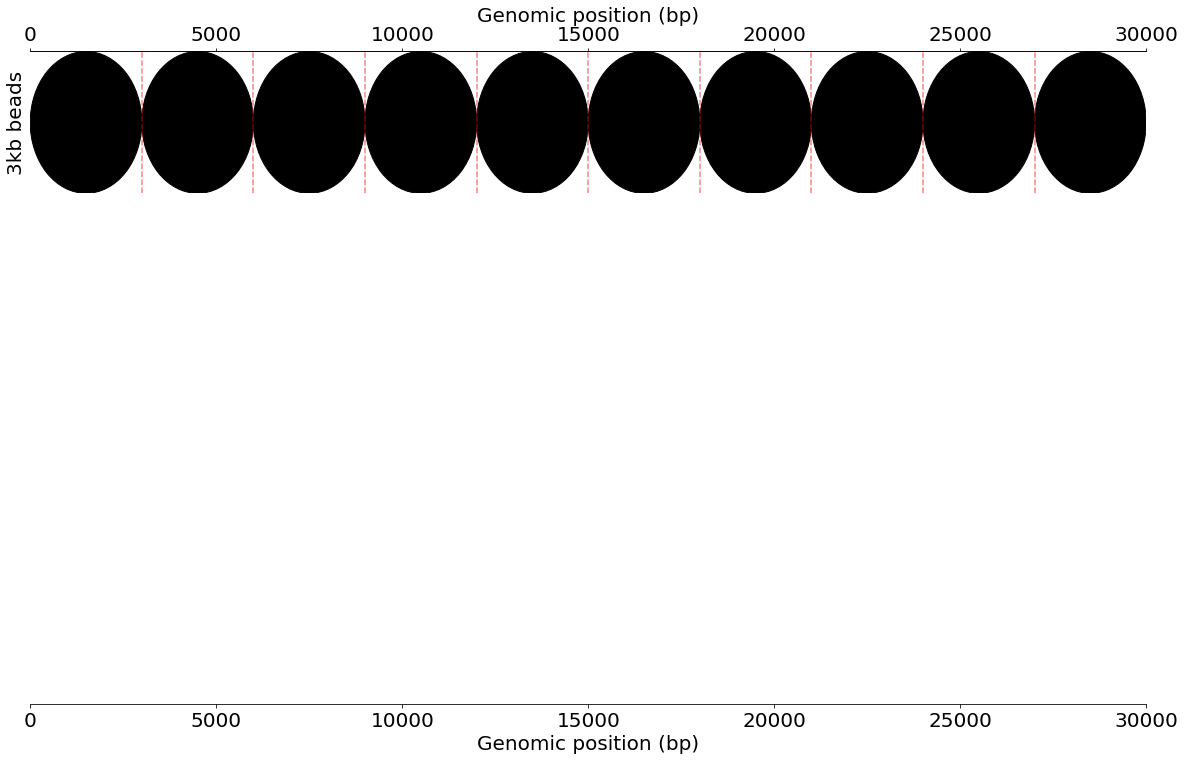

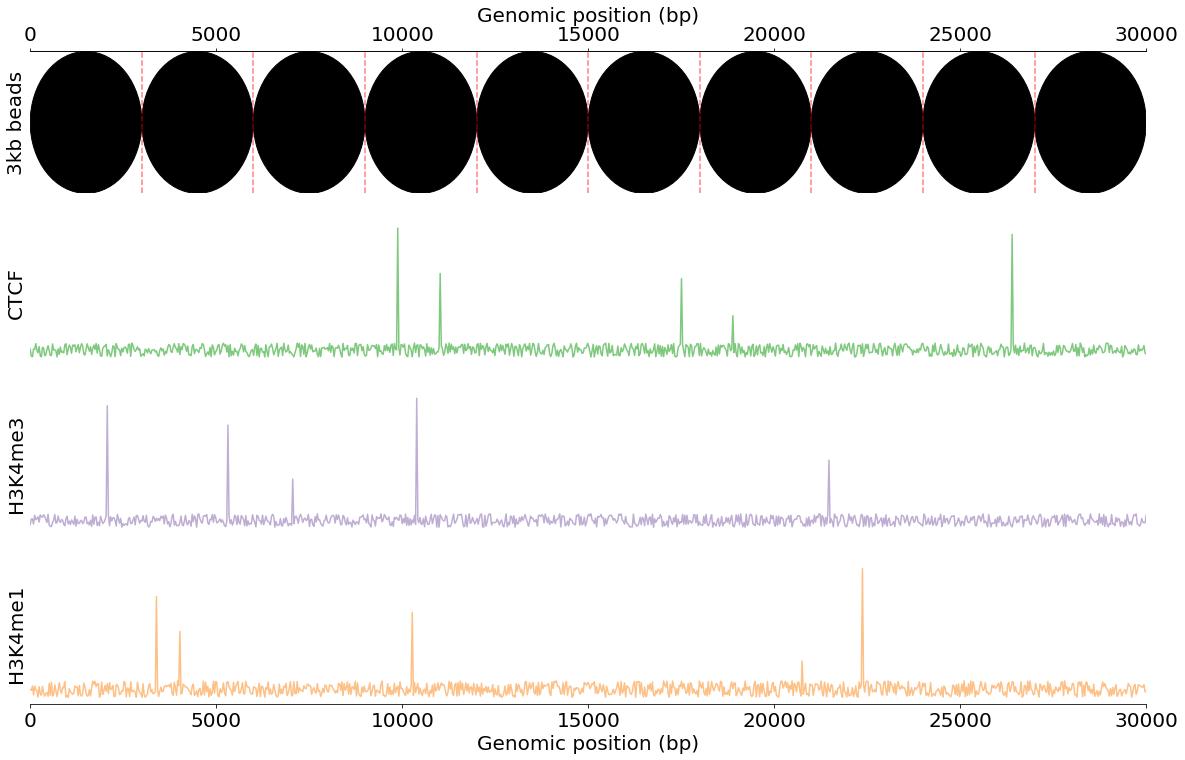

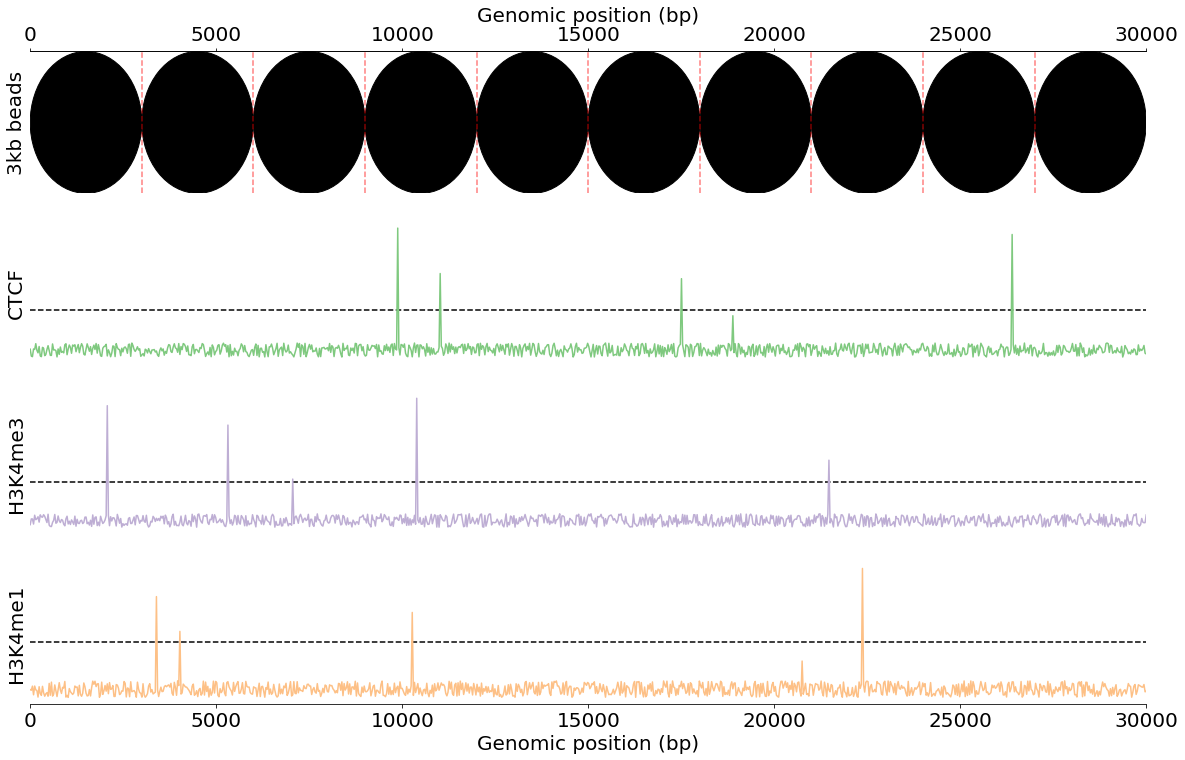

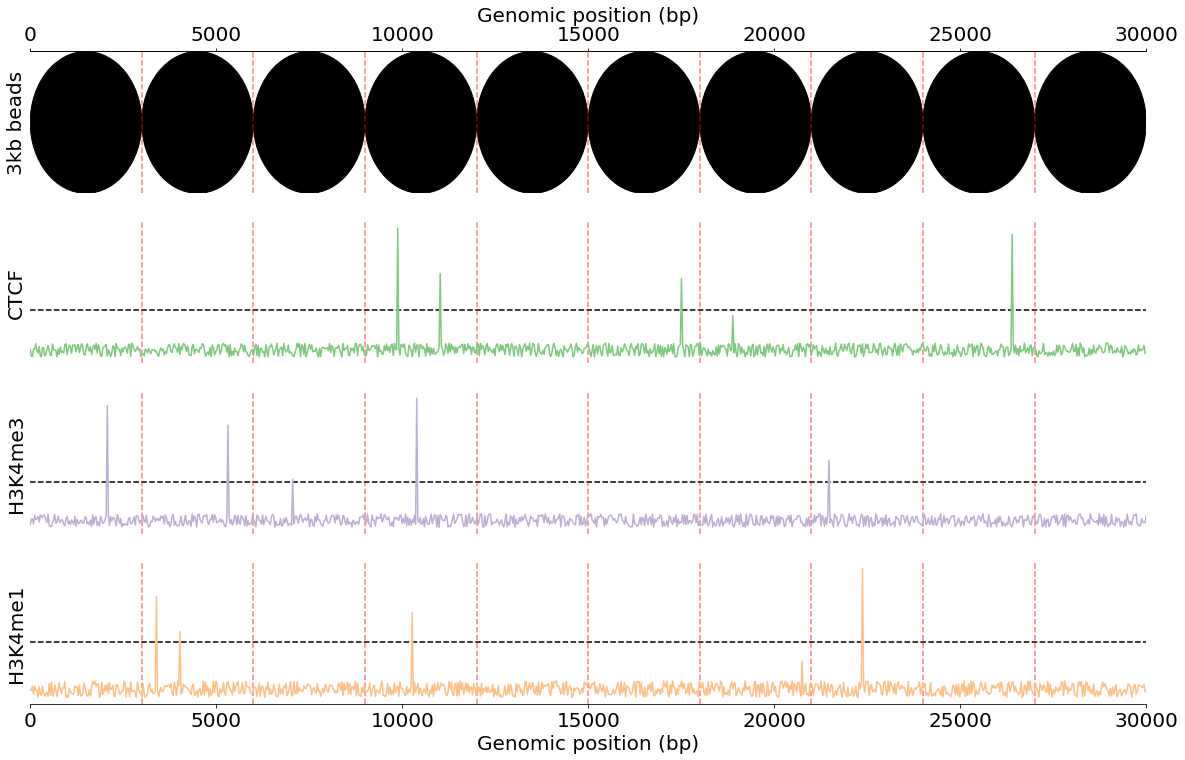

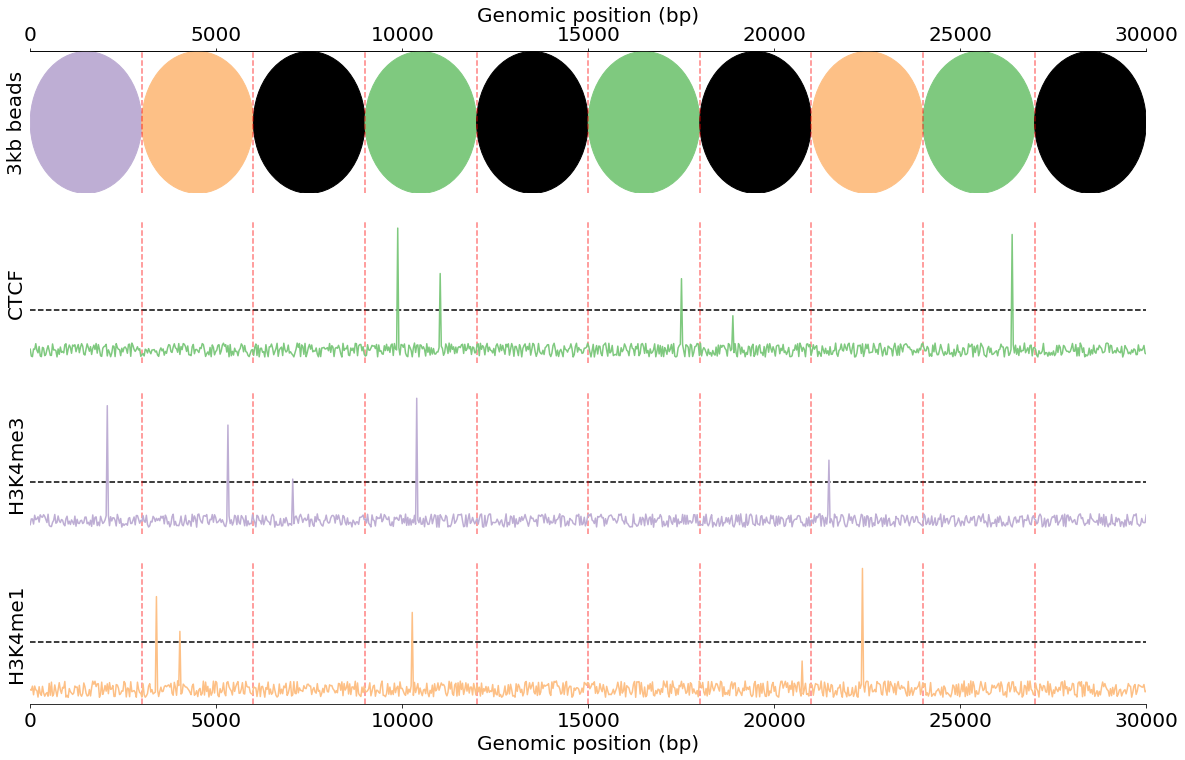

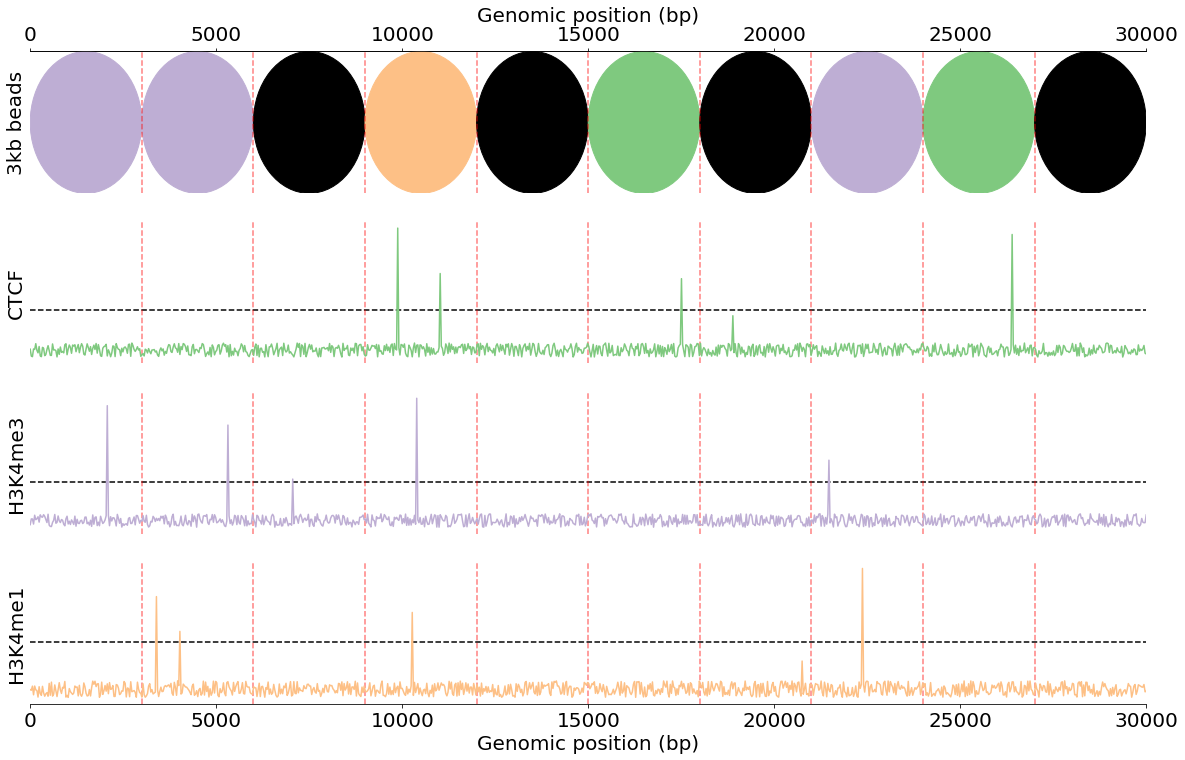

In [21]:
nBeads = 10
basesPerBead = 3000
nSamples = 1000
axisSize = basesPerBead * nBeads

# Define 3-colour colour blind friendly palette
colours = ['#7fc97f', '#beaed4', '#fdc086']
# Define y axis labels 
yLabels = [f'{int(basesPerBead/1000)}kb beads', 'CTCF', 'H3K4me3', 'H3K4me1']

configs = ([
    {'name': '0',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  False,
     'plotTracks': False,
     'vLineBead':  False ,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '1',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  False,
     'plotTracks': False,
     'vLineBead':  True ,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '2',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': False,
     'vLineBead':  True,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '3',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': True ,
     'vLineBead':  True,
     'vLineTrack': False,
     'hLine':      False},
    {'name': '4',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True ,
     'plotTracks': True ,
     'vLineBead':  True ,
     'vLineTrack': False,
     'hLine':      True },
    {'name': '5',
     'beadColours' : ['#000000', '#000000', '#000000', '#000000', '#000000', 
                      '#000000', '#000000', '#000000', '#000000', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      True},
    {'name': '6',
     'beadColours' : ['#beaed4', '#fdc086', '#000000', '#7fc97f', '#000000', 
                      '#7fc97f', '#000000', '#fdc086', '#7fc97f', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      True},
    {'name': '7',
     'beadColours' : ['#beaed4', '#beaed4', '#000000', '#fdc086', '#000000', 
                      '#7fc97f', '#000000', '#beaed4', '#7fc97f', '#000000'],
     'plotBeads':  True,
     'plotTracks': True,
     'vLineBead':  True,
     'vLineTrack': True,
     'hLine':      True}
])

for config in configs:
    np.random.seed(510)
    fig, axes = plt.subplots(4)
    for i, ax in enumerate(axes):
        if i == 0:
            ax, beadLinePos = plotBeads(
                ax, nBeads=nBeads, vLine=config['vLineBead'], plotDim=axisSize,
                plotBeads=config['plotBeads'], beadColours=config['beadColours']) 
            if config['plotBeads']:
                ax.set_ylabel(yLabels[i])
                
        else:
            if config['plotTracks']:
                if config['hLine']:
                    ax.axhline(nSamples / 3, linestyle = '--', color='black', alpha=1)
                if config['vLineTrack']:
                    for pos in beadLinePos:
                        ax.axvline(pos, color='r', linestyle='--', alpha=0.5)
                y = np.random.rand(nSamples)
                randomPos = np.random.randint(0, nSamples, int(nBeads / 2))
                y[randomPos] *= nSamples
                # Create boolean mask to obtain all other indices
                mask = np.ones(nSamples, dtype=bool)
                mask[randomPos] = False
                y[mask] *= (nSamples / 10)
                sns.lineplot(x=np.linspace(0, axisSize, nSamples), y=y, color=colours[i-1], ax=ax)
                ax.set_ylabel(yLabels[i])
            ax.set_xlim(0, axisSize)
        # Remove all yticks and ytick labels
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xlabel('Genomic position (bp)')

        # Add x axis to top of first plot
        if i == 0:
            secax = ax.secondary_xaxis('top')
            secax.set_xlabel('Genomic position (bp)')
        # Remove all axis spines except bottom subplot
        for spine in ['left', 'right', 'top', 'bottom']:
            if spine == 'bottom' and (i == len(axes) -1):
                continue
            elif spine == 'top' and (i == 0):
                continue
            ax.spines[spine].set_visible(False)
        if i != len(axes) - 1: 
            ax.axes.get_xaxis().set_visible(False)
        fig.savefig(f'polymerBeads-{config["name"]}.png', dpi=300)

In [29]:
basesPerBead = 1000
nBeads = 3000
rosette_length = 35000
beads_per_loop = rosette_length / basesPerBead
# Randomly select number of loops per turn between 4 and 12
loops_per_turn = 9
beads_per_turn = beads_per_loop * loops_per_turn
n_turns = nBeads / beads_per_turn

k = loops_per_turn / 2
vx = 0.38

theta = np.linspace(0, n_turns * 2 * np.pi, nBeads)
x = 12 * (vx + (1 - vx) * (np.cos(k * theta))**2 * np.cos(theta))
y = 12 * (vx + (1 - vx) * (np.cos(k * theta))**2 * np.sin(theta))
z = theta / (2 * np.pi)

In [30]:
def despine(ax, xlabel=''):
    """ Remove all frame and axis values except label """
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xlabel(xlabel)

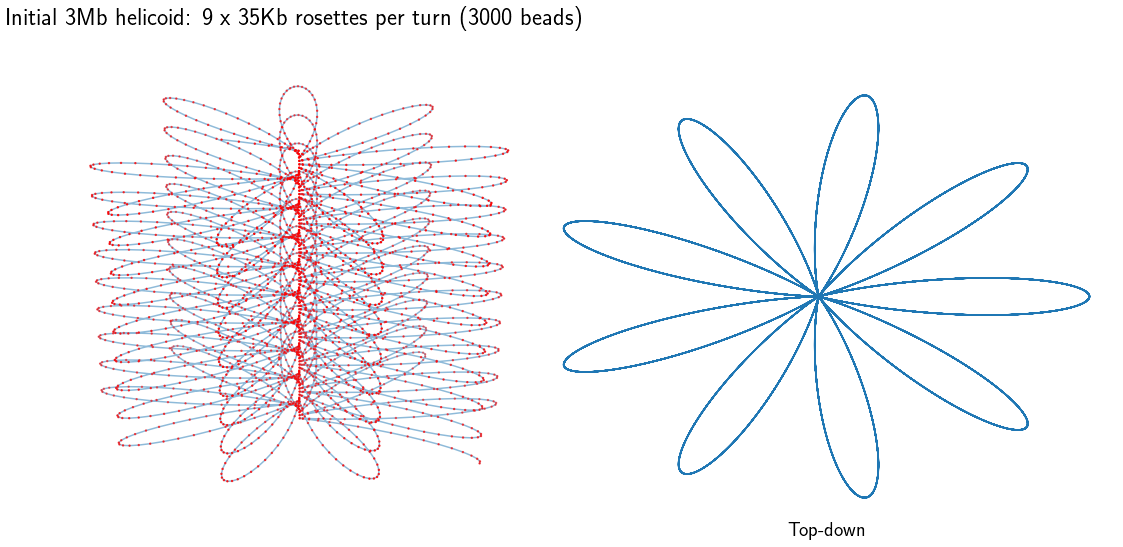

In [73]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.dist = 7
ax.axis("off")
ax.plot(x, y, z, linestyle='-', alpha=0.5)
ax.scatter(x, y, z, color='r', s=2)
plt.title('Initial 3Mb helicoid: 9 x 35Kb rosettes per turn (3000 beads)', pad=50, loc='left')
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y)
despine(ax, xlabel='Top-down')
#equation = (
#    r'$x(\theta) = 12 \sigma [x + (1-x) \ast cos^2(k\theta) \ast cos(\theta)]\\$'
#    r'$y(\theta) = 12 \sigma [x + (1-x) \ast cos^2(k\theta) \ast sin(\theta)]\\$'
#    r'$z(\theta) = \theta / 2\pi$')
#plt.text(10, 12,  equation, fontsize=16, color='r')

fig.tight_layout(w_pad=-11)
fig.savefig('initialConformation.png', dpi=300)

In [80]:
import pandas as pd

In [81]:
k = {}
k[1] = [2,3,4]
k[2] = [5,6,7]

In [94]:
a = (pd.DataFrame(
    k, index=['one','two','three'])
.reset_index().melt(id_vars='index'))
a.columns = ['beadID', 'time', 'tadStatus']

In [92]:
a

,beadID,time,tadStatus
0,one,1,2
1,two,1,3
2,three,1,4
3,one,2,5
4,two,2,6
5,three,2,7
